<a href="https://colab.research.google.com/github/darshu-web/Github_workshop/blob/main/Final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


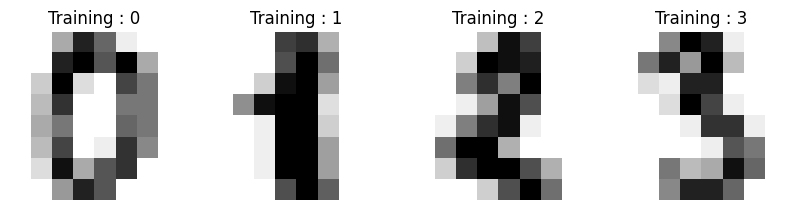

In [6]:
from sklearn.datasets import load_digits

df=load_digits()

_,axes=plt.subplots(nrows=1, ncols=4,figsize=(10,3))
for ax, image, label in zip(axes, df.images, df.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title("Training : %i" %label)



In [7]:
df.images.shape

(1797, 8, 8)

In [8]:
df.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [9]:
df.images[0].shape

(8, 8)

In [11]:
 len(df.images)

1797

In [15]:
n_samples=len(df.images)
data=df.images.reshape((n_samples,-1))

In [16]:
data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [17]:
data[0].shape

(64,)

In [18]:
data.shape

(1797, 64)

scaling image data


In [19]:
data.min()

0.0

In [20]:
data.max()

16.0

In [21]:
data=data/16

In [22]:
data.min()

0.0

In [23]:
data.max()

1.0

In [24]:
data[0]

array([0.    , 0.    , 0.3125, 0.8125, 0.5625, 0.0625, 0.    , 0.    ,
       0.    , 0.    , 0.8125, 0.9375, 0.625 , 0.9375, 0.3125, 0.    ,
       0.    , 0.1875, 0.9375, 0.125 , 0.    , 0.6875, 0.5   , 0.    ,
       0.    , 0.25  , 0.75  , 0.    , 0.    , 0.5   , 0.5   , 0.    ,
       0.    , 0.3125, 0.5   , 0.    , 0.    , 0.5625, 0.5   , 0.    ,
       0.    , 0.25  , 0.6875, 0.    , 0.0625, 0.75  , 0.4375, 0.    ,
       0.    , 0.125 , 0.875 , 0.3125, 0.625 , 0.75  , 0.    , 0.    ,
       0.    , 0.    , 0.375 , 0.8125, 0.625 , 0.    , 0.    , 0.    ])

train test split data


In [25]:
from sklearn.model_selection import train_test_split

In [49]:
X_train, X_test, y_train, y_test = train_test_split(data, df.target, test_size=0.3)


In [50]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1257, 64), (540, 64), (1257,), (540,))

Rndom forest Model

In [34]:
from sklearn.ensemble import RandomForestClassifier

In [35]:
rf=RandomForestClassifier()

In [51]:
rf.fit(X_train,y_train)

RandomForestClassifier()

predict test data

In [52]:
y_pred=rf.predict(X_test)

In [53]:
y_pred

array([2, 5, 1, 7, 2, 8, 0, 5, 6, 1, 1, 6, 1, 6, 5, 4, 9, 8, 8, 9, 7, 8,
       4, 2, 7, 8, 9, 1, 7, 8, 3, 1, 2, 9, 0, 1, 5, 1, 3, 4, 6, 3, 6, 2,
       4, 5, 3, 8, 6, 7, 7, 3, 2, 4, 8, 0, 3, 6, 4, 4, 1, 8, 7, 1, 7, 7,
       9, 8, 0, 4, 7, 2, 9, 2, 1, 3, 1, 2, 1, 9, 8, 8, 0, 2, 2, 3, 9, 3,
       0, 8, 5, 5, 6, 7, 3, 1, 1, 3, 0, 1, 6, 6, 8, 6, 1, 1, 7, 1, 5, 8,
       4, 3, 6, 8, 8, 6, 7, 1, 5, 6, 5, 3, 9, 9, 6, 3, 6, 3, 0, 7, 1, 8,
       2, 0, 3, 6, 1, 5, 1, 6, 5, 5, 8, 5, 3, 3, 0, 0, 2, 6, 5, 7, 4, 3,
       0, 3, 7, 9, 9, 0, 5, 9, 7, 0, 1, 8, 3, 7, 2, 1, 8, 4, 5, 0, 4, 7,
       9, 4, 4, 0, 0, 4, 9, 1, 4, 0, 7, 5, 0, 1, 4, 1, 5, 8, 2, 5, 4, 5,
       1, 0, 4, 9, 6, 8, 7, 3, 7, 5, 2, 3, 9, 6, 0, 5, 6, 2, 3, 2, 0, 1,
       2, 5, 8, 3, 5, 6, 3, 7, 8, 6, 7, 8, 2, 5, 8, 0, 7, 1, 8, 2, 2, 2,
       3, 3, 8, 7, 4, 7, 6, 4, 8, 9, 7, 7, 4, 2, 0, 4, 8, 5, 4, 1, 4, 0,
       9, 9, 8, 0, 6, 6, 6, 0, 6, 2, 9, 7, 6, 1, 8, 3, 5, 0, 7, 1, 5, 4,
       9, 5, 2, 1, 4, 4, 4, 4, 0, 0, 5, 8, 8, 3, 8,

In [57]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       0.92      0.98      0.95        58
           2       0.97      1.00      0.98        56
           3       0.98      1.00      0.99        53
           4       1.00      1.00      1.00        55
           5       0.96      0.96      0.96        54
           6       0.98      0.98      0.98        50
           7       0.97      0.98      0.97        59
           8       0.91      0.87      0.89        61
           9       0.98      0.88      0.93        51

    accuracy                           0.96       540
   macro avg       0.97      0.97      0.97       540
weighted avg       0.96      0.96      0.96       540

